In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv("Boston.csv")

data.head()

data.drop(data.columns[[0]], axis=1, inplace=True)

In [3]:
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())
print(data.describe())

(506, 14)
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000

<Axes: >

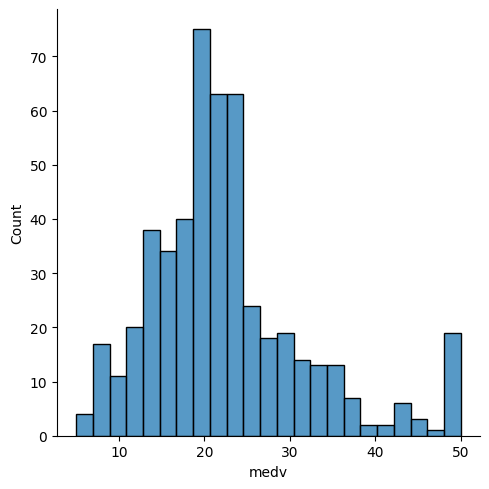

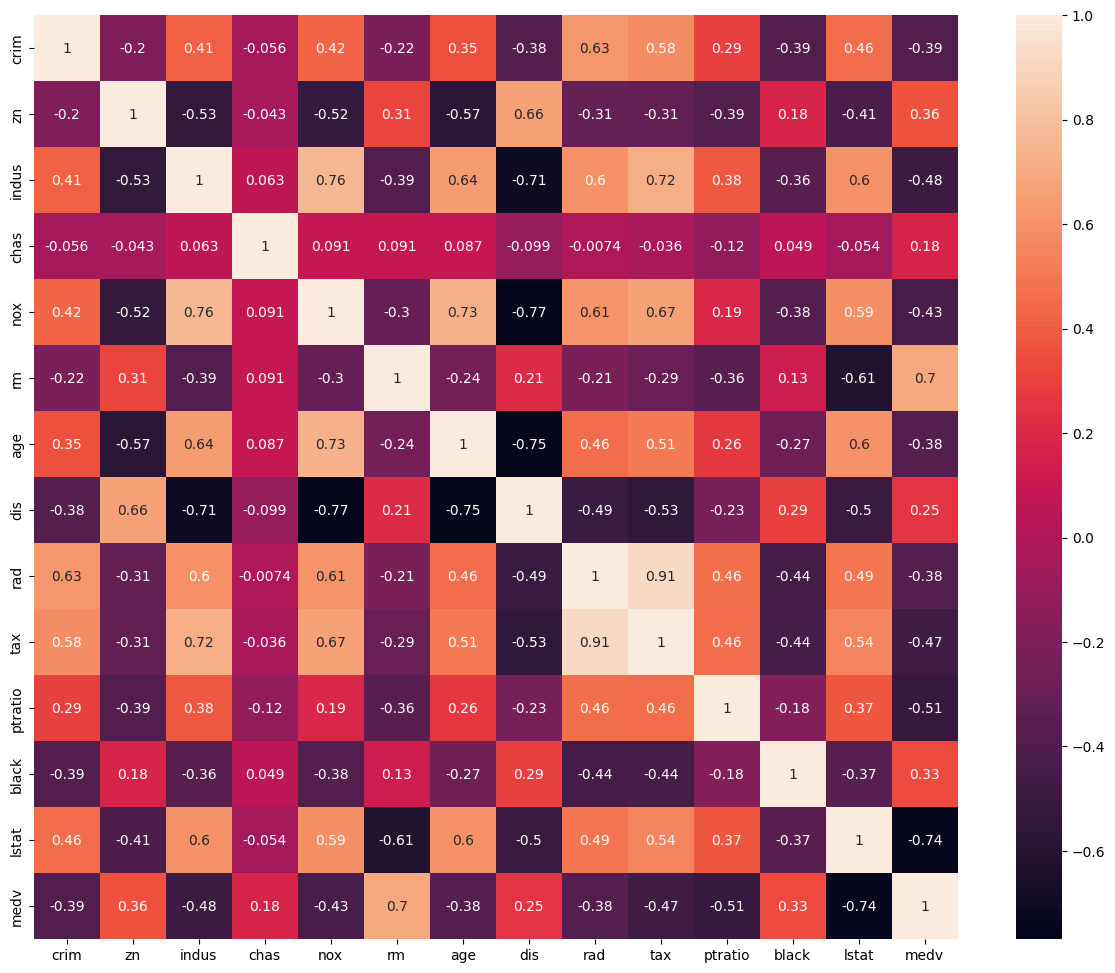

In [4]:
sns.displot(data.medv)
correlation = data.corr()
correlation.loc['medv']
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)


In [5]:
X = data.iloc[:,:-1]
y= data.medv
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 562.9170
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 504.9483
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 359.1431
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 142.2252
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 75.5516
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 40.1216
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 27.9506
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 23.1229
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 20.4864
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 18.6286
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 17.5694
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 16.1705
Epoch 13/100
13/13 [=

In [9]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

4/4 [==============================] - 0s 2ms/step
R2 Score =  0.8993462632576308
RMSE Score =  3.057719335157904
